In [124]:
import plotly.express as px
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import warnings
os.environ["OMP_NUM_THREADS"] = "4"
warnings.filterwarnings("ignore", category=UserWarning, message=".*KMeans is known to have a memory leak.*")

In [125]:
df = pd.read_csv("student_performance_data.csv")

# Clean data by removing non-numerical columns
df_scores = df.drop(columns=["gender", "parent_education", 'lunch', "prep"])

# Scaling the data
scaler = StandardScaler()
df_scores_scaled = scaler.fit_transform(df_scores)

# Convert to DataFrame for easier handling
df_scores_scaled = pd.DataFrame(df_scores_scaled, columns=df_scores.columns)

In [126]:
fig = px.scatter_3d(df_scores_scaled, 
                    x="math", 
                    y="reading", 
                    z="writing", 
                    title='3D Scatter Plot of Student Scores (Before Clustering)')

fig.update_traces(marker=dict(size=5))  
fig.show()

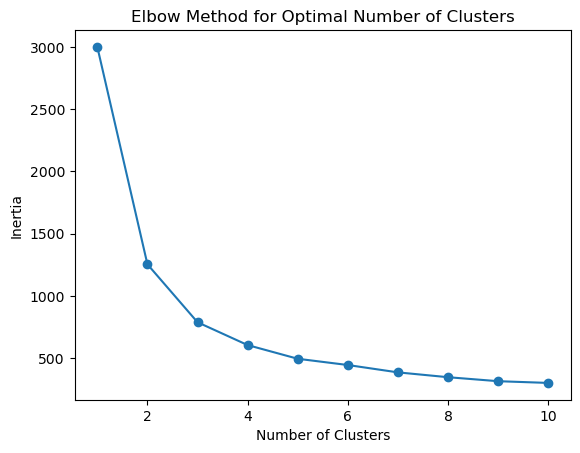

In [127]:
k_values = range(1, 11)
inertia = []

# Loop through values of k and compute inertia
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scores_scaled)
    inertia.append(kmeans.inertia_)

# Plot the inertia for each k
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [128]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=100)

# Perform clustering and add the 'cluster' column to the DataFrame
df_scores_scaled['cluster'] = kmeans.fit_predict(df_scores_scaled)

# Get the centroids (should match the number of features)
centroids = kmeans.cluster_centers_

# Create DataFrame for centroids (it should have the same number of columns as df_scores)
centroids_df = pd.DataFrame(centroids, columns=["math", "reading", "writing"])

In [129]:
#%% Data Visualization: 3D Scatter Plot
# Visualize the data points with clusters
fig = px.scatter_3d(df_scores_scaled, 
                    x="math", 
                    y="reading", 
                    z="writing", 
                    color='cluster',  # Color by the cluster labels
                    title='3D Scatter Plot with Clusters')
fig.update_traces(marker=dict(size=5)) 
fig.show()

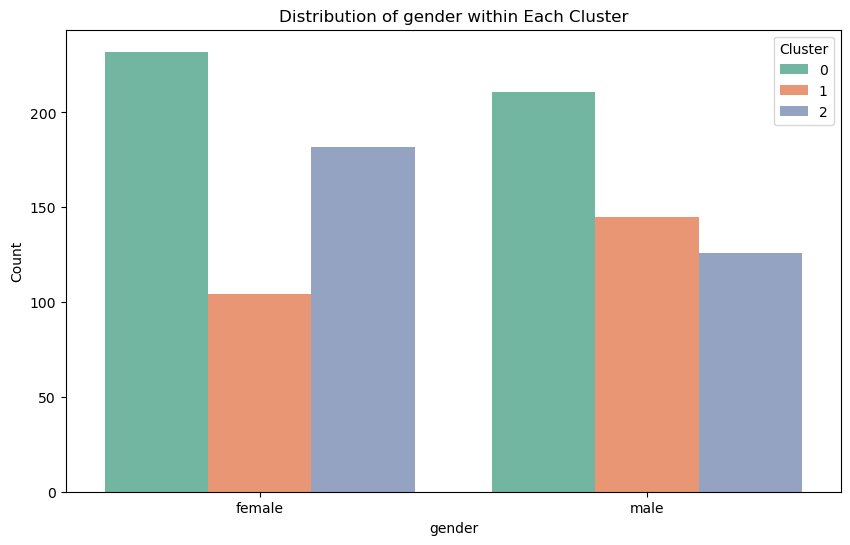

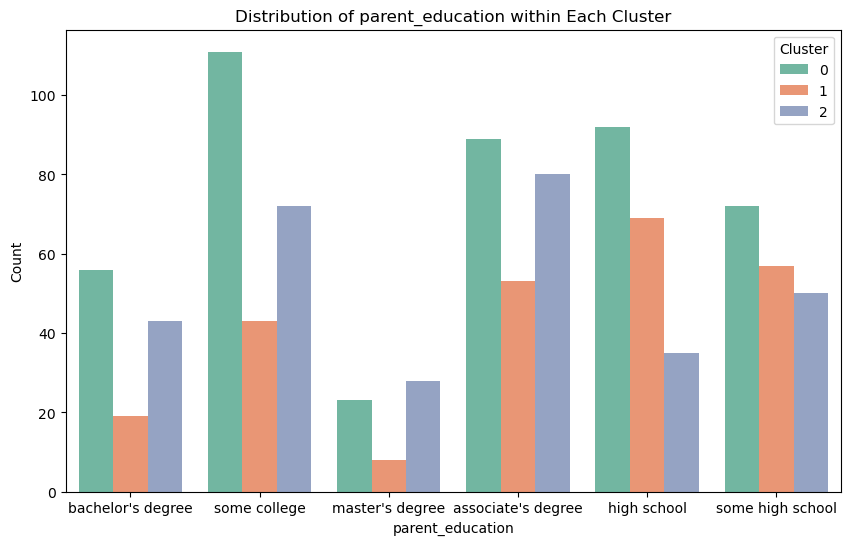

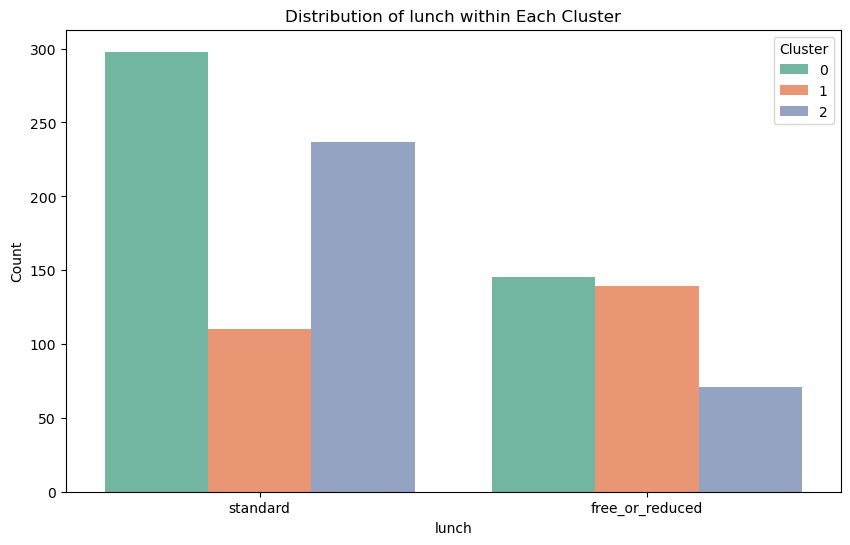

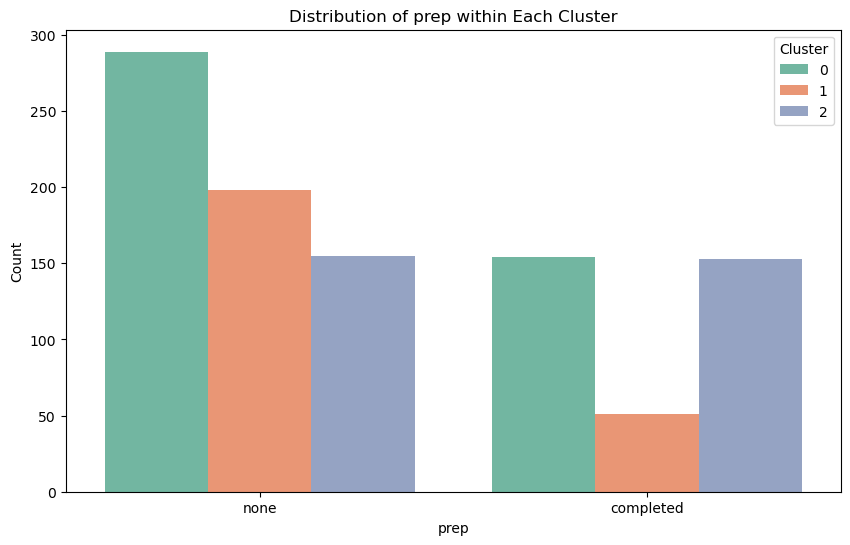

,math,reading,writing
0,-0.049513,-0.048706,-0.015297
1,-1.187201,-1.267625,-1.288384
2,1.030998,1.094855,1.063585


In [130]:


#%% Inspecting the categorical variables within clusters
df['cluster'] = df_scores_scaled['cluster']

categorical_columns = ["gender", "parent_education", "lunch", "prep"]  
for col in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=col, hue='cluster', palette="Set2")
    plt.title(f"Distribution of {col} within Each Cluster")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.legend(title='Cluster')
    plt.show()

#%% Display centroids
centroids_df